In [1]:
import altair as alt
import pandas as pd

data = pd.read_csv("dog-bites-cleaned.csv")

In [5]:
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [13]:
data.head(8)

,Unnamed: 0,UniqueID,DateOfBite,Species,Breed,Age,Gender,SpayNeuter,Borough,ZipCode
0,0,1,2015-01-02,DOG,"Poodle, Standard",3.0,M,True,Brooklyn,11238
1,1,2,2015-01-02,DOG,HUSKY,NaN,U,False,Brooklyn,11249
2,2,3,2015-01-02,DOG,NaN,NaN,U,False,Brooklyn,0
3,3,4,2015-01-01,DOG,American Pit Bull Terrier/Pit Bull,6.0,M,False,Brooklyn,11221
4,4,5,2015-01-03,DOG,American Pit Bull Terrier/Pit Bull,1.0,M,False,Brooklyn,11207
5,5,6,2015-01-05,DOG,American Pit Bull Terrier/Pit Bull,1.0,F,False,Brooklyn,11209
6,6,7,2015-01-04,DOG,MORKIE,1.0,M,False,Brooklyn,11220
7,7,8,2015-01-05,DOG,Chihuahua,1.0,M,False,Brooklyn,11237


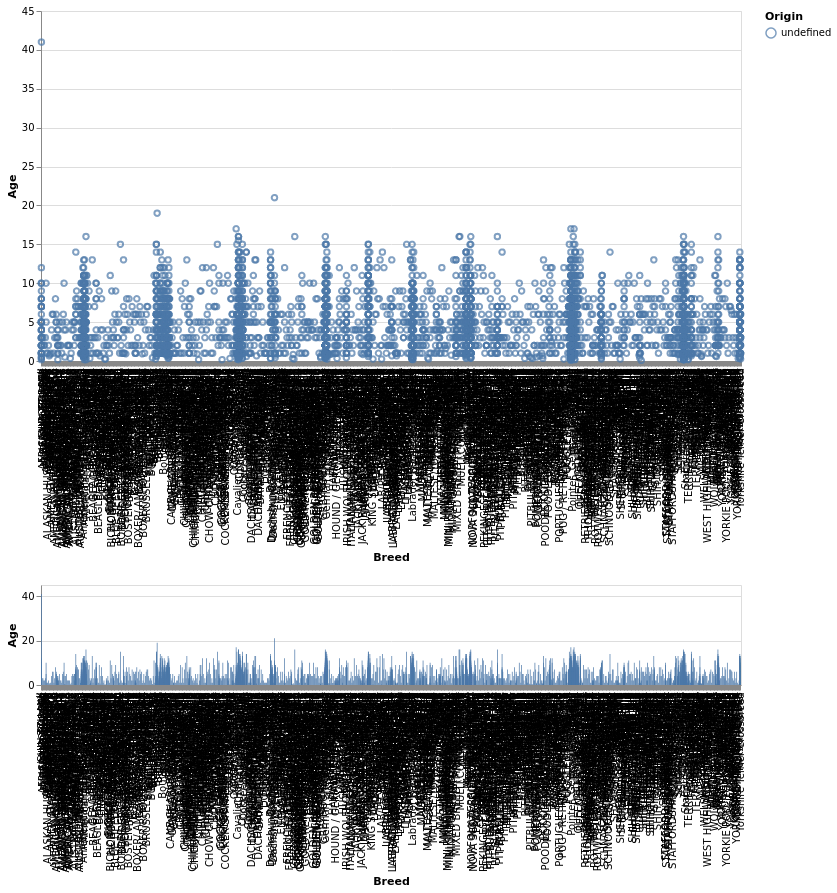

In [31]:
brush = alt.selection_interval()

points =   alt.Chart(data)\
              .mark_point()\
              .encode(
                        y = 'Age',
                        x = 'Breed',
                        color = alt.condition(
                                                brush,
                                                'Origin:N',
                                                alt.value('lightgray')
                                              ) 
                     )\
              .add_selection(
                                brush
                             )\
              .properties(
                            width = 700,
                            height = 350
                         )  

bars =  alt.Chart(data)\
           .mark_bar()\
           .encode(
                    y = 'Age',
                    x = 'Breed'
                  )\
           .transform_filter(brush)\
           .properties(
                         width = 700,
                         height = 100
                      ) 

points & bars